In [123]:
import numpy as np

from __future__ import print_function
from sklearn import metrics

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm


In [126]:
truth_path = 'data_v2/dev.iob2'
prediction_path = 'dev_pred.iob2'


In [127]:
labels = ['B-celltypeline',
 'B-cellularcomponent',
 'B-mirna',
 'B-organismsspecies',
 'B-proteingene',
 'B-smallmolecule',
 'B-tissuesorgans',
 'I-celltypeline',
 'I-cellularcomponent',
 'I-organismsspecies',
 'I-proteingene',
 'I-smallmolecule',
 'I-tissuesorgans',
 'O']

In [128]:
with open(truth_path) as f:
    truth = f.readlines()
with open(prediction_path) as f:
    prediction = f.readlines()

In [129]:
len(prediction), len(truth)

(71255, 71255)

In [145]:
words = {}

In [146]:
truth_labels = []
pred_labels = []

for t,p in zip(truth, prediction):
    if len(t) != 1:
        tw, tl = t[:-1].split(' ')
        pw, pl = p[:-1].split(' ')
        if tw != pw:
            print("ERROR!!!", tw, pw)
        if tw not in words:
            words[tw] = {"truth":[],"pred":[]}
        words[tw]["truth"].append(labels.index(tl))
        words[tw]["pred"].append(labels.index(pl))
        truth_labels.append(labels.index(tl))#  < 13)
        pred_labels.append(labels.index(pl))#  < 13)

truth_labels = np.array(truth_labels)
pred_labels = np.array(pred_labels)    

In [176]:
freq_words = {k:a for k,a in words.items() if len(a['truth']) > 20}

In [133]:
cm = metrics.confusion_matrix(truth_labels, pred_labels, labels=range(len(labels)))

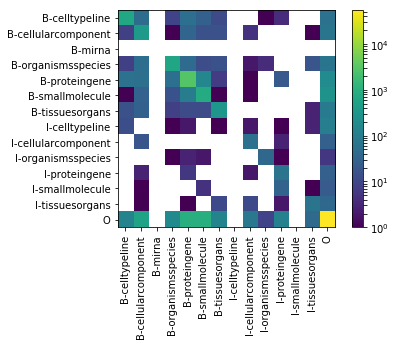

In [134]:
# plt.imshow(np.log(cm))
plt.imshow(cm, norm=LogNorm())
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.colorbar();

In [135]:
p = metrics.precision_score(truth_labels, pred_labels, labels=range(14), average=None)

r = metrics.recall_score(truth_labels, pred_labels, labels=range(14), average=None)

f1 = metrics.f1_score(truth_labels, pred_labels, labels=range(14), average=None)

In [136]:
print("Accuracy: {:.2f}% \n".format(100 * metrics.accuracy_score(truth_labels, pred_labels)))

print("{:20s} \t Precision \t Recall \t F-score".format('Name'))
for name, pp,rr,ff in zip(labels, p,r,f1):
    print("{:20s} \t {:5.2f}% \t {:5.2f}% \t {:5.2f}%".format(name, pp * 100, rr * 100, ff * 100))

Accuracy: 92.19% 

Name                 	 Precision 	 Recall 	 F-score
B-celltypeline       	 74.92% 	 76.55% 	 75.73%
B-cellularcomponent  	 32.35% 	 71.07% 	 44.46%
B-mirna              	  0.00% 	  0.00% 	  0.00%
B-organismsspecies   	 69.27% 	 73.15% 	 71.15%
B-proteingene        	 71.06% 	 84.68% 	 77.27%
B-smallmolecule      	 41.80% 	 66.88% 	 51.45%
B-tissuesorgans      	 60.95% 	 65.05% 	 62.93%
I-celltypeline       	  0.00% 	  0.00% 	  0.00%
I-cellularcomponent  	 36.59% 	 54.05% 	 43.64%
I-organismsspecies   	 73.08% 	 74.51% 	 73.79%
I-proteingene        	 26.17% 	 62.62% 	 36.91%
I-smallmolecule      	  0.00% 	  0.00% 	  0.00%
I-tissuesorgans      	 48.89% 	 50.00% 	 49.44%
O                    	 98.27% 	 94.64% 	 96.42%


# Word level confusion matrices

In [181]:
word_accuracies = {k:(len(a['truth']), metrics.accuracy_score(a['truth'], a['pred'])) for k,a in words.items()}

In [201]:
worst_predictions = {k:a for k,a in word_accuracies.items() if a[1] < 0.5 and a[0] > 15}
print(len(worst_predictions))

18


In [232]:
def draw_cm(word):
    cm = metrics.confusion_matrix(words[word]['truth'], words[word]['pred'], labels=range(len(labels)))
    plt.figure()
    plt.imshow(cm) #, norm=LogNorm())
    plt.title("{} ({} occurences, {:.0f}% accuracy)".format(
        word.decode('utf-8').encode('ascii', 'replace'), 
        len(words[word]['truth']),
        100*metrics.accuracy_score(words[word]['truth'], words[word]['pred'])
    ))
    for (j,i),label in np.ndenumerate(cm):
        if label != 0:
            plt.text(i,j,label,ha='center',va='center')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar()

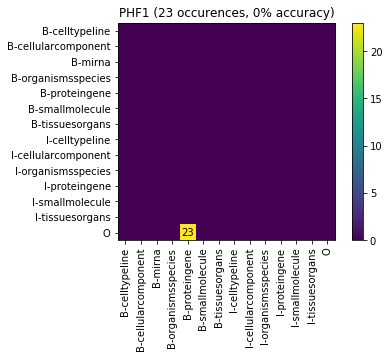

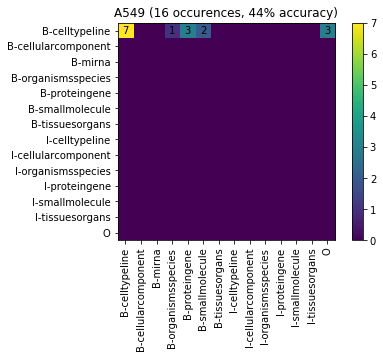

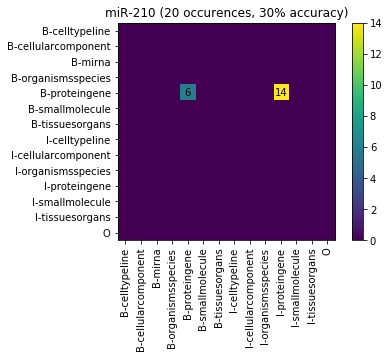

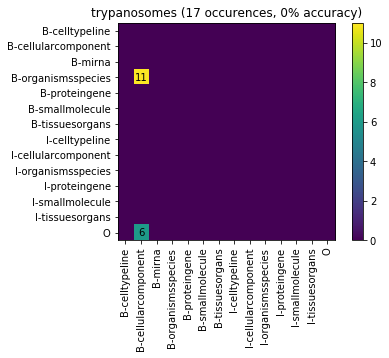

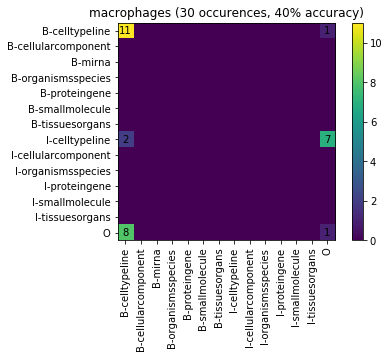

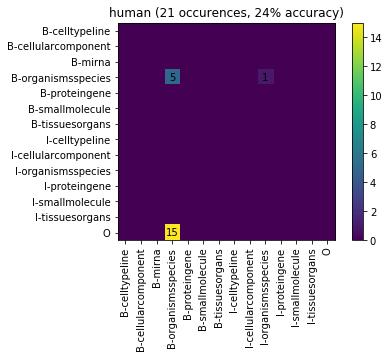

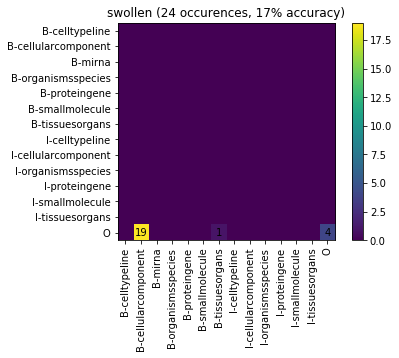

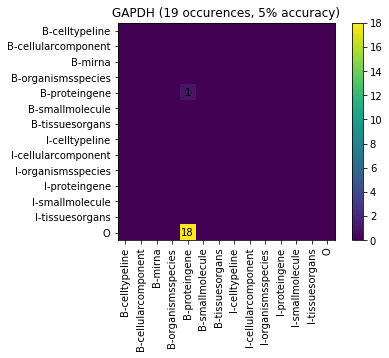

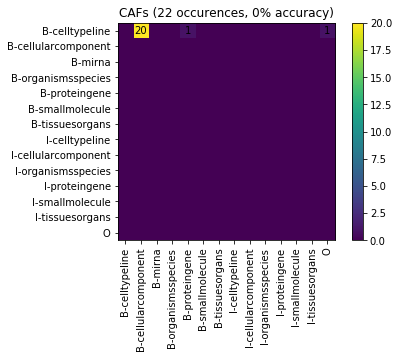

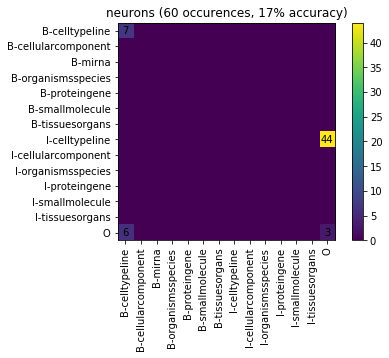

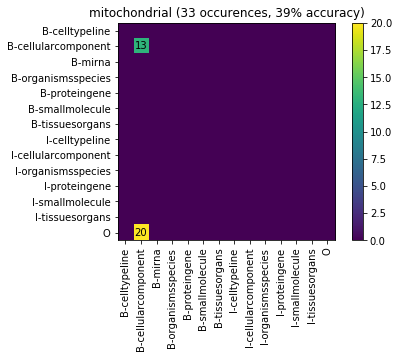

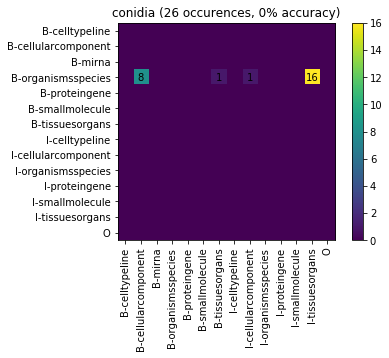

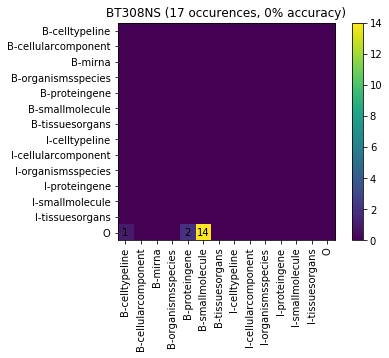

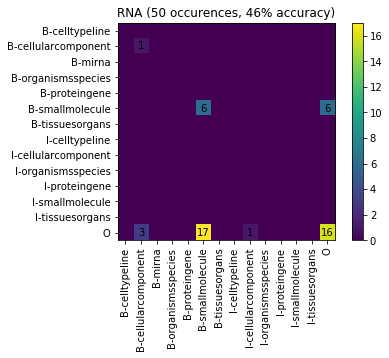

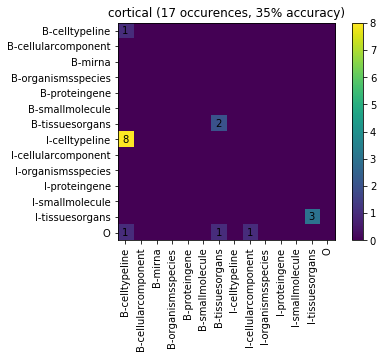

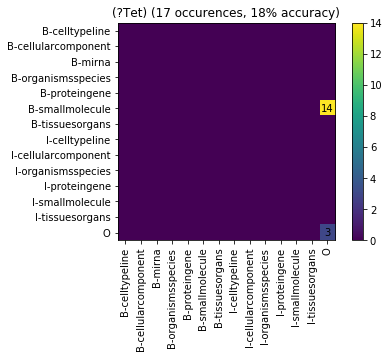

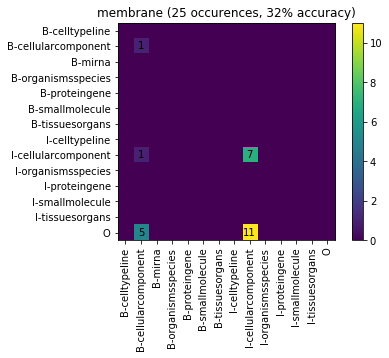

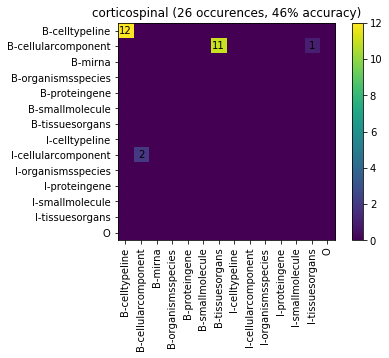

In [233]:
for w in worst_predictions.keys():
    draw_cm(w)

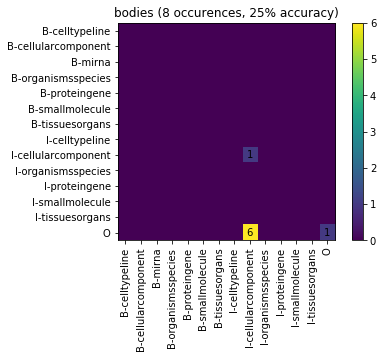

In [234]:
draw_cm('bodies')